In [62]:
import torch
import torch.nn as nn
from torch.optim import SGD
from numpy import *
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
plt.style.use(['science','notebook','grid'])
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [63]:
vals = load(r"C:\Users\Nunocastanheira\Desktop\boooks\research\Gelb!\Code\SESSA-Project-main\output\Master.npy")

In [64]:
energy = torch.tensor(vals[0,0,:,0],dtype=torch.float)
thickness = torch.tensor(range(1,25),dtype=torch.float)
counts = torch.tensor(vals[0,:,:,1],dtype=torch.float)
train = torch.tensor(vals[0,:,:,1],dtype=torch.float)*10**7
print(shape(energy))
print(shape(test))
print(shape(thickness))
print(energy)
print(test)

torch.Size([2048])
torch.Size([24, 2048])
torch.Size([24])
tensor([ 500.0000,  500.4880,  500.9770,  ..., 1498.5400, 1499.0200,
        1499.5100])
tensor([[2.9532, 2.9536, 2.9540,  ..., 0.0036, 0.0036, 0.0036],
        [2.9545, 2.9549, 2.9553,  ..., 0.0037, 0.0037, 0.0037],
        [2.9357, 2.9361, 2.9365,  ..., 0.0038, 0.0038, 0.0038],
        ...,
        [2.9114, 2.9118, 2.9122,  ..., 0.0047, 0.0047, 0.0046],
        [2.8748, 2.8752, 2.8755,  ..., 0.0047, 0.0047, 0.0047],
        [2.9147, 2.9151, 2.9154,  ..., 0.0048, 0.0047, 0.0047]])


In [65]:
def train_model(x,y,f, n_epochs=500):
    opt = SGD(f.parameters(), lr=10**-4)
    L = nn.MSELoss()

    # Train model
    losses = []
    for _ in tqdm(range(n_epochs)):
        opt.zero_grad() 
        loss_value = L(f(x), y)
        loss_value.backward() 
        opt.step() 
        losses.append(loss_value.item())
    return f, losses

N = 2**9
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2048,N)
        self.Matrix2 = nn.Linear(N,N)
        self.Matrix3 = nn.Linear(N,N)
        self.Matrix4 = nn.Linear(N,1)
        self.R = nn.ReLU()
        self.E = nn.Tanh()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.E(self.Matrix3(x))
        x = self.Matrix4(x)
        return x.squeeze()

x = train
y = thickness
f = MyNeuralNet()

# Train model
f, losses = train_model(x,y,f, n_epochs=100000)

100%|██████████| 100000/100000 [12:44<00:00, 130.82it/s]


In [66]:
losses[-1]

0.0024325435515493155

In [67]:
shape(f(x))

torch.Size([24])

In [68]:
f(x)

tensor([ 1.0007,  1.9999,  2.9999,  4.0011,  5.0003,  6.0004,  7.0008,  7.9968,
         9.0040, 10.0009, 11.0150, 11.9685, 13.0183, 14.0011, 15.0007, 16.0468,
        16.9230, 18.0445, 18.9898, 20.0013, 20.9347, 22.0570, 23.1450, 23.8656],
       grad_fn=<SqueezeBackward0>)

In [69]:
thickness

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

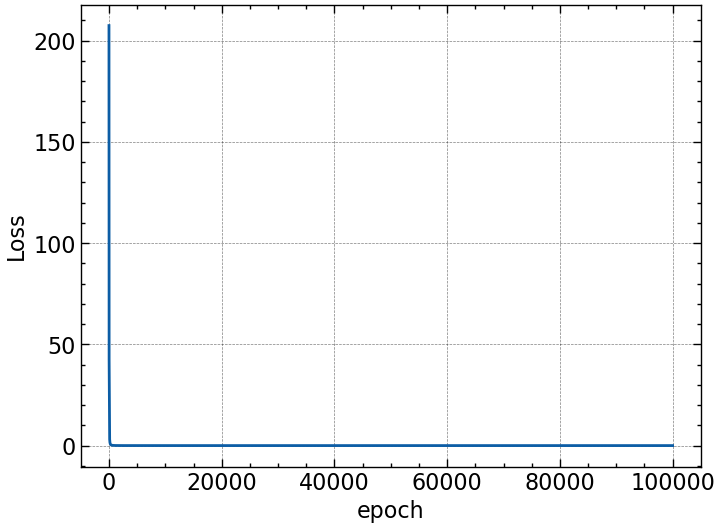

In [70]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

In [71]:
#torch.save(f, 'data to thickness lite lite.pt')

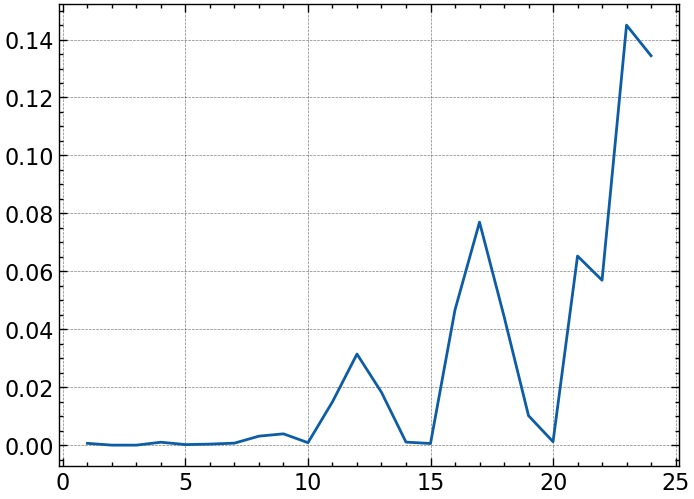

In [73]:
#plt.plot(thickness.detach().numpy(), abs(thickness-f(x)).detach().numpy())

In [154]:
vals2 = load(r"C:\Users\Nunocastanheira\Desktop\boooks\research\Gelb!\Code\test\Master2.npy")

In [155]:
s =vals2[0,:,:,1]
r = s
test = (torch.tensor(s,dtype=torch.float)*10**7)


In [156]:
f(test)

tensor([24.5100, 25.2800, 25.7916, 26.3057, 26.7347, 27.1508, 27.4373, 27.7447,
        27.8894, 28.1021, 28.3024, 28.4571, 28.5777, 28.6740, 28.7735, 28.8643,
        28.9668, 29.0038, 29.0902, 29.1567, 29.1806, 29.2301, 29.2994, 29.3173],
       grad_fn=<SqueezeBackward0>)

In [157]:
shape(s)

(24, 2048)

In [158]:
r0 = r[0]
r2 = r[2]


In [159]:
r[0] = r2

In [160]:
test2 = (torch.tensor(r,dtype=torch.float)*10**7)

In [161]:
f(test2)

tensor([25.7916, 25.2800, 25.7916, 26.3057, 26.7347, 27.1508, 27.4373, 27.7447,
        27.8894, 28.1021, 28.3024, 28.4571, 28.5777, 28.6740, 28.7735, 28.8643,
        28.9668, 29.0038, 29.0902, 29.1567, 29.1806, 29.2301, 29.2994, 29.3173],
       grad_fn=<SqueezeBackward0>)